### Trabalho Final da Matéria de Processamento de Imagens - BCC FURB

<b>Turma:</b> SUP-CMP.187.0.2-2024/1<br>
<b>Docente:</b> Aurélio Faustino Hoppe<br>
<b>Discentes:</b> Arthur B Pinotti, Kaue Reblin, Luiz G Klitzke<br>

In [19]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
# Parâmetros

img_height, img_width = 256, 256

path_dataset = "Images"
labels_classes = ["Habitado", "NaoHabitado"]
_batch_size = 64

In [26]:
#Obtem os datasets de treino e validação através da estrutura de pastas

train_dataset, validation_dataset  = keras.utils.image_dataset_from_directory(
    path_dataset,
    labels = "inferred",
    label_mode = "int",
    class_names = labels_classes,
    color_mode = "rgb",
    batch_size = _batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    validation_split = 0.3, #Usa n% de dados para validação
    subset = "both",
    verbose =  True,
    seed = 1024,
)

Found 486 files belonging to 2 classes.
Using 341 files for training.
Using 145 files for validation.


In [32]:
augmentation_layers = [
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(factor=(-.03, 0.3))
]

def data_augmentation(x):
    for layer in augmentation_layers:
        x = layer(x)
    return x


train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


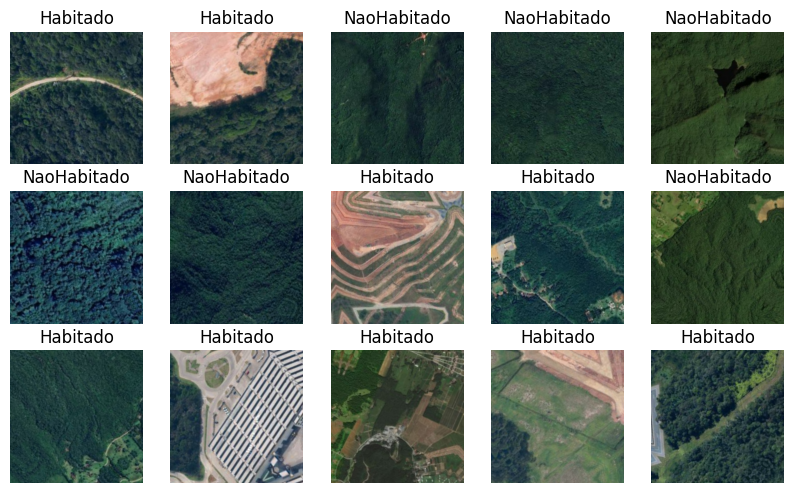

In [33]:
print (train_dataset)
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(2):
    for i in range(15):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels_classes[labels[i]])
        plt.axis("off")

In [39]:
cnn = keras.models.Sequential()

cnn.add(keras.layers.InputLayer(input_shape=(img_height, img_width, 3)))
cnn.add(keras.layers.Rescaling(scale = 1./255, offset=-1))

cnn.add(keras.layers.Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='same'))
cnn.add(keras.layers.MaxPool2D(pool_size=(3, 3), padding='valid'))

cnn.add(keras.layers.Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))

cnn.add(keras.layers.BatchNormalization())

cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(units=100, activation='relu'))
cnn.add(keras.layers.BatchNormalization())

cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(units=100, activation='relu'))
cnn.add(keras.layers.BatchNormalization())

cnn.add(keras.layers.Dropout(0.25))

# output layer
cnn.add(keras.layers.Dense(1, activation='sigmoid'))

cnn.summary()

c:\Users\luizk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 256, 256, 50)   │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 128, 128, 50)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 70)     │        31,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 70)     │           280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 286720)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │    28,672,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,718,751 (109.55 MB)

 Trainable params: 28,718,211 (109.55 MB)

 Non-trainable params: 540 (2.11 KB)

In [37]:
# Compilação do cnno
cnn.compile(
    loss='binary_crossentropy', #https://keras.io/api/losses/probabilistic_losses/#sparse_categorical_crossentropy-function
    optimizer='adam', #https://keras.io/api/optimizers/
    metrics=['accuracy']
)

# Callback de EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',  # Monitora a perda na validação
    patience= 5,  # Número de epochs sem melhora antes de parar
    restore_best_weights = True)  # Restaura os pesos do melhor modelo encontrado


# Treinamento do cnno
history_cnn = cnn.fit(
    train_dataset,
    epochs = 30,
    validation_data = validation_dataset,
    callbacks=[early_stopping]  # Adiciona a callback de Early Stopping
)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6469 - loss: 0.7273 - val_accuracy: 0.3379 - val_loss: 0.9164
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7828 - loss: 0.5167 - val_accuracy: 0.3379 - val_loss: 1.3575
Epoch 3/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8281 - loss: 0.4621

KeyboardInterrupt: 

In [ ]:
# Avaliação do cnno
loss, accuracy = cnn.evaluate(validation_dataset, verbose = 1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.8383 - loss: 0.3516


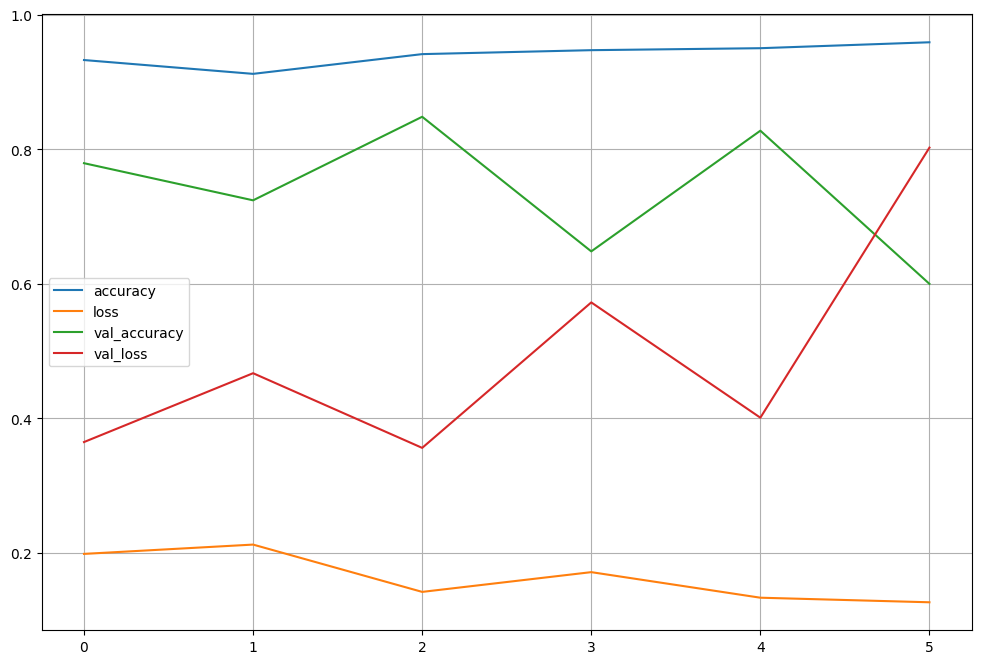

In [ ]:
#Apresenta os dados da performânce do algoritmo, atráves do membro history, preenchido com a execução.
pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.show()